# Spin Cycle to Inferno
## How your washing machine could be a firestarter!
### London Fire Brigade - White Goods Analysis

#### This notebook analyses data relating to fires caused by white goods in London.

"The London Fire Brigade attend a number of fires each year where the ignition source of the fire is recorded as 'white goods' (e.g. washing machine, dishwasher, refrigerator). This data sets provides details of such fires by London borough and ward location, and the type of white goods concerned as well as the property type where the fire happened. Where known, the brand and model of the white goods item is included, although this is added as free text so there may be errors it spelling, etc. The data is from January 2009 and is updated annually for each calendar year." (London Datastore)

[Dataset](https://data.london.gov.uk/dataset/fires-in-london---cause-of-ignition-is-white-goods)

[Population figures](https://www.data.gov.uk/dataset/a76f46f9-c10b-4fe7-82f6-aa928471fcd1/land-area-and-population-density-ward-and-borough/datafile/d509bc74-8451-4017-bc28-df5d177f8a3c/preview)

## Import and clean data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_excel(r'C:\Users\imoge\AllMLProjects\Data\White goods fires from 2009.xlsx')

In [3]:
# Check shape
data.shape

(5035, 17)

In [4]:
# Check head
data.head()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
0,2009,December,Primary Fire,Offices and call centres,0,0,E09000033,Westminster,E05013808,West End,Electricity,Dishwasher,Wiring insulation,Kitchen,Other,Unknown,unknown
1,2009,July,Primary Fire,Food and Drink,0,0,E09000030,Tower Hamlets,E05009326,Limehouse,Electricity,Fridge/Freezer,Other item,Store room,NaN,NaN,NaN
2,2009,December,Primary Fire,House in Multiple Occupation,0,0,E09000031,Waltham Forest,E05013891,High Street,Electricity,Fridge/Freezer,Plastic - raw material only,Kitchen,AEG,NaN,Not known
3,2009,April,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000023,Lewisham,E05013732,Telegraph Hill,Electricity,Washer/Dryer combined,Wiring insulation,Kitchen,CANDY,NaN,Aquarius 1300
4,2009,May,Primary Fire,Food and Drink,0,0,E09000001,City of London,E05009305,Farringdon Without,Electricity,Fridge/Freezer,Plastic - raw material only,Other,QUEST,NaN,SNR92


In [5]:
# Check datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        5035 non-null   int64 
 1   Month                       5035 non-null   object
 2   IncType                     5035 non-null   object
 3   ParentPropertyType          5035 non-null   object
 4   NumFireDeaths               5035 non-null   int64 
 5   NumAllFireInjuries          5035 non-null   int64 
 6   IncGeo_BoroughCode          5035 non-null   object
 7   IncGeo_BoroughName          5035 non-null   object
 8   IncGeo_WardCode             5033 non-null   object
 9   IncGeo_WardName             5033 non-null   object
 10  IgnitionSourcePower         5035 non-null   object
 11  IgnitionSource              5035 non-null   object
 12  ItemFirstIgnited            5035 non-null   object
 13  LocationFireStarted         5035 non-null   obje

## Assessment of the data and cleaning
We have a lot of missing values in the main cause model columns as well as a few in the appliance manufacturer colums.

In [6]:
df = data.copy()

In [7]:
# Number of nulls for applicance manufacturer
df['ApplianceManufacturer'].isnull().sum()

573

In [8]:
# Number of nulls for appliance manufacturer other
df['ApplianceManufacturerOther'].isnull().sum()

4445

In [9]:
# Value counts
df['ApplianceManufacturer'].value_counts()

HOTPOINT       842
Other          594
INDESIT        509
BEKO           375
BOSCH          350
              ... 
WARWICK          1
ARRON            1
SPEED QUEEN      1
DICON            1
AKAI             1
Name: ApplianceManufacturer, Length: 190, dtype: int64

In [10]:
# Number of nulls for main cause model
df['MainCauseModel'].isnull().sum()

651

In [11]:
# Value counts for this column
df['MainCauseModel'].value_counts()

unknown                257
Unknown                149
not known              146
Not known               68
Not Known               59
                      ... 
Aquarius extra wd64      1
A146CDW                  1
spin                     1
A Class Frostfree        1
GO482/2-80               1
Name: MainCauseModel, Length: 2984, dtype: int64

We will drop the appliance manufacturer other column as there are so many blanks. We will also drop the main cause model as many of the entries although not blank, have 'unknown' as entries.

In [12]:
# Drop columns with a lot of missing values
df.drop(columns = ['ApplianceManufacturerOther','MainCauseModel'],axis = 1, inplace = True)

In [13]:
df.head()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer
0,2009,December,Primary Fire,Offices and call centres,0,0,E09000033,Westminster,E05013808,West End,Electricity,Dishwasher,Wiring insulation,Kitchen,Other
1,2009,July,Primary Fire,Food and Drink,0,0,E09000030,Tower Hamlets,E05009326,Limehouse,Electricity,Fridge/Freezer,Other item,Store room,NaN
2,2009,December,Primary Fire,House in Multiple Occupation,0,0,E09000031,Waltham Forest,E05013891,High Street,Electricity,Fridge/Freezer,Plastic - raw material only,Kitchen,AEG
3,2009,April,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000023,Lewisham,E05013732,Telegraph Hill,Electricity,Washer/Dryer combined,Wiring insulation,Kitchen,CANDY
4,2009,May,Primary Fire,Food and Drink,0,0,E09000001,City of London,E05009305,Farringdon Without,Electricity,Fridge/Freezer,Plastic - raw material only,Other,QUEST


We also have a couple of missing values in the Geo Ward Code and Geo Ward Name columns

In [14]:
df[df['IncGeo_WardCode'].isnull()]

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer
4663,2023,June,Primary Fire,Food and Drink,0,0,E09000025,NEWHAM,NaN,NaN,Electricity,Fridge - Freestanding,Printed circuit board,Kitchen,Other
4939,2024,July,Primary Fire,Road Vehicle,0,0,E09000025,NEWHAM,NaN,NaN,Electricity,Fridge - Freestanding,Internal Fittings,Other inside/Cargo area,NaN


We could drop these but there is some useful information there about the fire type, so we will leave them for now

In [15]:
# Check value counts of years
df['Year'].value_counts()

2018    360
2012    341
2017    334
2019    331
2010    329
2011    329
2015    323
2013    322
2014    319
2009    305
2021    302
2016    302
2022    286
2020    263
2023    257
2024    237
2025     95
Name: Year, dtype: int64

We will drop  those relating to 2025 as we only have a few observations so far

In [16]:
df = df[df['Year']!=2025]
df.shape

(4940, 15)

## Data Analysis

#### Number of Fires by Month over the Period

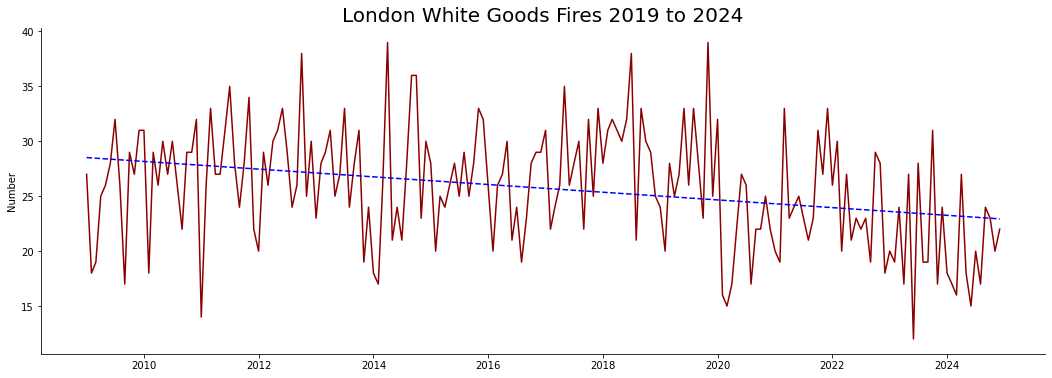

In [17]:
# Create a new column of months 
df['MonthsNum'] = df['Month']

# Replace the month names with numbers
df['MonthsNum'].replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                     'October':10,'November':11,'December':12},inplace = True)

# Create a date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['MonthsNum'].astype(str))

# Create dataframe of date and number of fires
fires = df.groupby(['Date'],as_index = False)['IncType'].count().set_index('Date')

# Plot the data
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(fires, color = 'darkred')
plt.title("London White Goods Fires 2019 to 2024",fontsize = 20)
plt.ylabel("Number")
ax.spines[['right', 'top']].set_visible(False);

# Add a trendline
import matplotlib.dates as mdates
x = mdates.date2num(fires.index)
y= fires['IncType']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#then the plot
plt.plot(x, p(x), "b--");

Looking at the plot of fires over time, there is some downward trend, there might be some seasonality also

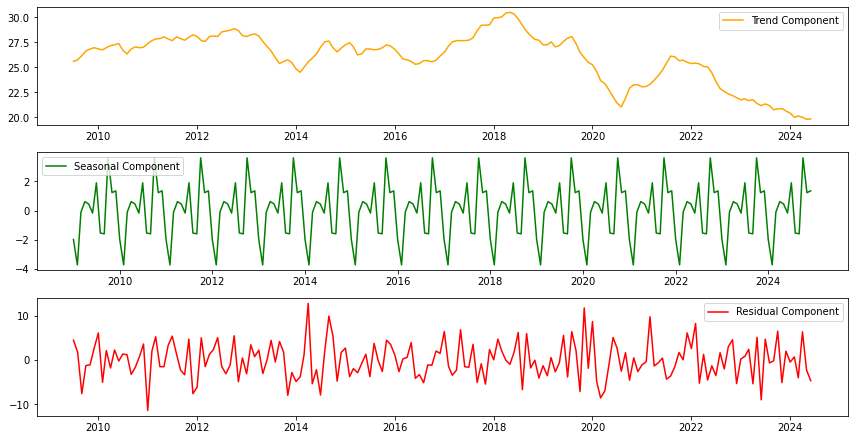

In [18]:
# Decomposition to split out the components
from statsmodels.tsa.seasonal import seasonal_decompose
series = fires['IncType']
decomposition = seasonal_decompose(series, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend Component', color='orange')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonal Component', color='green')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residual Component', color='red')
plt.legend()

plt.tight_layout()
plt.show()


Seems that the fires are more common in the autumn and lowest at the start of the year. We will look at this a bit more in following sections

#### Number of Fires by Year

Which years have the most and least number of reported fires?

In [19]:
# Mean number of fires across the period
df.groupby('Year')['Year'].count().mean()

308.75

In [20]:
# Create function for plotting

def plot_func(df,X,Y,kind,t,xlab,ylab):
    fig,ax = plt.subplots(figsize = (8,6))
    df.groupby(X)[Y].count().plot(kind = kind, 
                                        title = t,
                                        color = 'darkred')
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlabel(xlab, labelpad = 12)
    plt.ylabel(ylab, labelpad = 12)
    plt.xticks(rotation = 45);
    

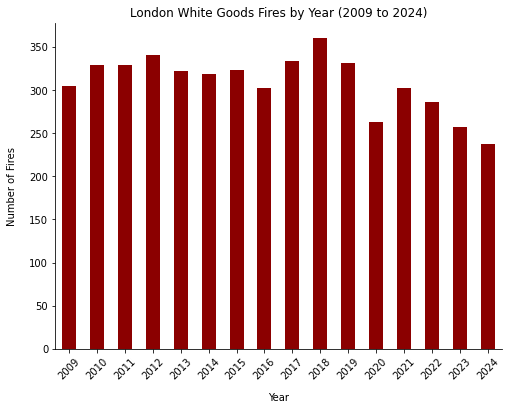

In [21]:
# Plot fires by year
plot_func(df,'Year',"Year","bar",'London White Goods Fires by Year (2009 to 2024)', "Year","Number of Fires")

We can see that 2018 had the most white goods fires, with the least in 2024. There appears to be a trend downwards of incidents from 2018 overall. Does this reflect greater public awareness through information after the high number occurring in 2018? What particular issues were relevant to the higher amount of fires in 2018, this could be weather related or other factors at play.

#### Number of Fires by Month

Which months have the most and least reported fires?

In [22]:
# Set the months using ordered categoricals to be able to sort them
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['MonthName'] = pd.CategoricalIndex(df['Month'], ordered = True, categories = months)
df.groupby('MonthName')['MonthName'].count()

MonthName
January      386
February     350
March        405
April        422
May          420
June         412
July         440
August       385
September    391
October      468
November     429
December     432
Name: MonthName, dtype: int64

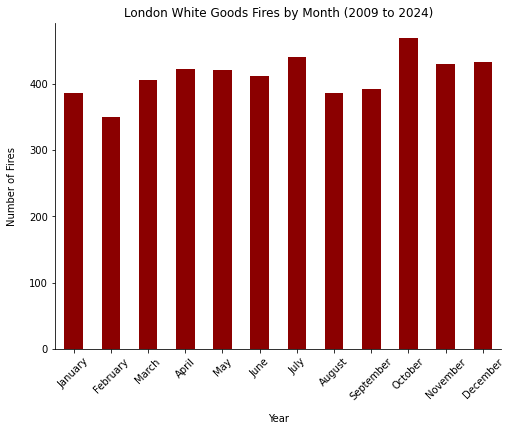

In [23]:
# Plot fires by month
plot_func(df,"MonthName","MonthName","bar",'London White Goods Fires by Month (2009 to 2024)',"Year","Number of Fires")

We can see that the month of October has the highest number of incidents at 468, with the least in February at 348. The previous time series analysis suggested seasonality in the data with more incidents over the autumn. Depending on the type of white good involved, this might reflect increasing use of the equipment into the autumn period as the weather changes, so we will consider this when we analyse the type of white good in a later section. There is also a drop in the early part months of the year. This could be due to the purchase of newer equipment in the sales but also February is a short month. 

#### Number of Fires by Incident Type

In [24]:
# Types of fire
df['IncType'].value_counts(normalize = True)

Primary Fire    0.998178
Late Call       0.001822
Name: IncType, dtype: float64

Almost % of the incidents are categorised as a primary fire rather than a late call. Primary fires are more dangerous, late calls are those that are extinguished by the time the event is attended

#### Number of Fires by Property Type

In [25]:
# Fires by property type
df['ParentPropertyType'].value_counts(normalize = True)*100

Dwelling                                       44.473684
Purpose Built Flats/Maisonettes                29.251012
Converted Flats/Maisonettes                    11.174089
Non Residential                                 2.955466
Retail                                          2.894737
Food and Drink                                  2.064777
House in Multiple Occupation                    1.639676
Residential Home                                1.052632
Offices and call centres                        0.910931
Other Residential                               0.829960
Education                                       0.809717
Hospitals and medical care                      0.506073
Outdoor structures                              0.384615
Entertainment and culture                       0.283401
Industrial Manufacturing                        0.141700
Sporting venues                                 0.121457
Road Vehicle                                    0.121457
Warehouses and bulk storage    

We can see that the majority of fires are in dwellings, flats and maisonettes. To visualise this a little better we can just take the top five locations

In [26]:
# Percentage accounted for by top five
df['ParentPropertyType'].value_counts(normalize = True).head(5).sum()*100

90.74898785425101

In [27]:
# Create function for plotting dataframe with top 5

def plot_func2(df,X,Y,kind,t,xlab,ylab):
    fig,ax = plt.subplots(figsize = (10,6))
    df.groupby(X)[Y].count().sort_values(ascending = False).head(5).plot(kind = kind, 
                                        title = t,
                                        color = 'darkred')
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlabel(xlab, labelpad = 12)
    plt.ylabel(ylab, labelpad = 12)
    plt.xticks(rotation = 45)
    ax.invert_yaxis();
    

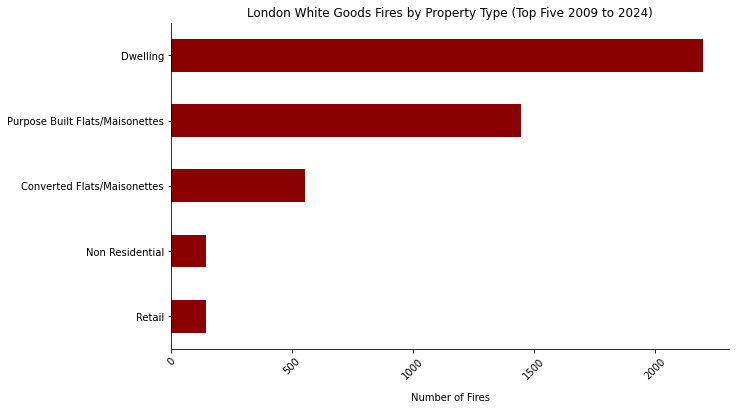

In [28]:
# Plot by property type
plot_func2(df,"ParentPropertyType","ParentPropertyType","barh",'London White Goods Fires by Property Type (Top Five 2009 to 2024)',
         "Number of Fires",None)

#### Number of deaths and injuries from Fires

In [29]:
# How many deaths and injuries?
print("Deaths:",df['NumFireDeaths'].sum())
print("Injuries",df['NumAllFireInjuries'].sum())
print("Mean Deaths per Year:",df['NumFireDeaths'].sum()/15)
print("Mean Injuries per Year",df['NumAllFireInjuries'].sum()/15)

Deaths: 85
Injuries 709
Mean Deaths per Year: 5.666666666666667
Mean Injuries per Year 47.266666666666666


In [30]:
# Number of incidents by number of deaths
df['NumFireDeaths'].value_counts()

0     4931
1        6
2        1
6        1
71       1
Name: NumFireDeaths, dtype: int64

The one incident of 71 deaths relates to Grenfell Tower which was in Kensington and Chelsea

In [31]:
# Number of incidents by number of injuries
df['NumAllFireInjuries'].value_counts()

0      4604
1       215
2        55
3        29
4        19
5         9
6         4
7         2
109       1
10        1
19        1
Name: NumAllFireInjuries, dtype: int64

In [32]:
# Create function for plotting deaths and injuries

def plot_func3(df,X,Y,kind,t,xlab,ylab):
    fig,ax = plt.subplots(figsize = (8,6))
    df.groupby(X)[Y].sum().plot(kind = kind, 
                                        title = t,
                                        color = 'darkred')
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlabel(xlab, labelpad = 12)
    plt.ylabel(ylab, labelpad = 12)
    plt.xticks(rotation = 45)
    ax.text(0.58, 0.9, 'Grenfell Tower', 
        fontsize=14,transform=ax.transAxes,
        verticalalignment='top');
    

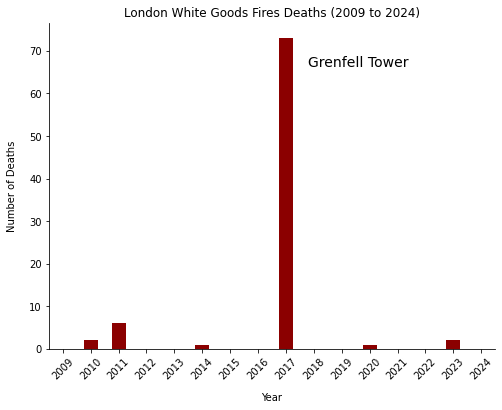

In [33]:
# Plot deaths by year
plot_func3(df,"Year","NumFireDeaths",'bar','London White Goods Fires Deaths (2009 to 2024)', "Year","Number of Deaths")

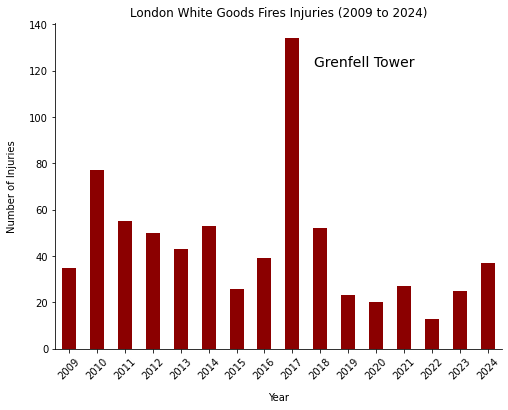

In [34]:
# Plot injuries by year
plot_func3(df,"Year",'NumAllFireInjuries','bar','London White Goods Fires Injuries (2009 to 2024)', "Year","Number of Injuries")

In [35]:
df

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,MonthsNum,Date,MonthName
0,2009,December,Primary Fire,Offices and call centres,0,0,E09000033,Westminster,E05013808,West End,Electricity,Dishwasher,Wiring insulation,Kitchen,Other,12,2009-12-01,December
1,2009,July,Primary Fire,Food and Drink,0,0,E09000030,Tower Hamlets,E05009326,Limehouse,Electricity,Fridge/Freezer,Other item,Store room,NaN,7,2009-07-01,July
2,2009,December,Primary Fire,House in Multiple Occupation,0,0,E09000031,Waltham Forest,E05013891,High Street,Electricity,Fridge/Freezer,Plastic - raw material only,Kitchen,AEG,12,2009-12-01,December
3,2009,April,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000023,Lewisham,E05013732,Telegraph Hill,Electricity,Washer/Dryer combined,Wiring insulation,Kitchen,CANDY,4,2009-04-01,April
4,2009,May,Primary Fire,Food and Drink,0,0,E09000001,City of London,E05009305,Farringdon Without,Electricity,Fridge/Freezer,Plastic - raw material only,Other,QUEST,5,2009-05-01,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,2024,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,WESTMINSTER,E05013799,LITTLE VENICE,Electricity,Washer/Dryer combined,Rubber - raw material only,Kitchen,INDESIT,7,2024-07-01,July
4936,2024,October,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000012,HACKNEY,E05009372,HACKNEY CENTRAL,Electricity,Washer/Dryer combined,Clothing,Utility room,NaN,10,2024-10-01,October
4937,2024,July,Primary Fire,Dwelling,0,0,E09000021,KINGSTON UPON THAMES,E05013945,TOLWORTH,Electricity,Freezer - Freestanding,"Paper, cardboard",Garage,Other,7,2024-07-01,July
4938,2024,August,Primary Fire,Retail,0,0,E09000010,ENFIELD,E05013679,EDMONTON GREEN,Electricity,Fridge - Freestanding,Capacitor,Shop floor/Showroom/Display hall,NaN,8,2024-08-01,August


Total of 85 deaths and 707 injuries over the 16 year period which equates to 5 and 47 per year on average  
The Grenfell Tower incident stands out as an outlier on the chart, where 71 lives were lost and 109 injuries occurred in June 2017  
An electrical fire expert says the blaze probably started from a Hotpoint fridge-freezer in Flat 16 of the tower block. A photo of the small wire connector which is thought to have overheated and started the fire was shown to the inquiry. It was recovered from a small relay compressor compartment at the bottom rear of the fridge-freezer unit.

[Source](https://news.sky.com/story/grenfell-tower-inquiry-faulty-wiring-in-fridge-freezer-started-fire-says-expert-11565956)

#### Fires by IncGeo_BoroughCode

In [36]:
# Top Five locations
df.groupby('IncGeo_BoroughCode')['IncGeo_BoroughCode'].count().sort_values(ascending = False).head(10)

IncGeo_BoroughCode
E09000008    260
E09000003    251
E09000028    204
E09000022    200
E09000023    195
E09000009    189
E09000033    188
E09000032    182
E09000006    182
E09000017    170
Name: IncGeo_BoroughCode, dtype: int64

In [37]:
# Top Five locations
df.groupby('IncGeo_BoroughName')['IncGeo_BoroughName'].count().sort_values(ascending = False).head(10)

IncGeo_BoroughName
BARNET        145
CROYDON       144
LAMBETH       128
SOUTHWARK     125
Croydon       116
WANDSWORTH    112
LEWISHAM      112
BROMLEY       110
EALING        108
Barnet        106
Name: IncGeo_BoroughName, dtype: int64

We have some data cleaning to do with the borough names that are not consistently entered in terms of the free text. For example in the top ten by count of incidents we can see that Barnet and Croydon are shown twice, in upper case and proper case. We could use a reference table but first we will try just setting the case to a consistent case.

In [38]:
# Set to title case
df['BoroughName'] = df['IncGeo_BoroughName'].str.title()

In [39]:
# Check the value counts by borough
df['BoroughName'].value_counts()

Croydon                   260
Barnet                    251
Southwark                 204
Lambeth                   200
Lewisham                  195
Ealing                    189
Westminster               188
Bromley                   182
Wandsworth                182
Hillingdon                170
Enfield                   164
Hackney                   162
Brent                     158
Greenwich                 152
Tower Hamlets             148
Waltham Forest            148
Haringey                  144
Hounslow                  142
Bexley                    140
Islington                 139
Newham                    138
Redbridge                 137
Havering                  136
Hammersmith And Fulham    127
Camden                    124
Harrow                    120
Sutton                    118
Kensington And Chelsea    113
Barking And Dagenham      112
Merton                    104
Kingston Upon Thames       89
Richmond Upon Thames       84
City Of London             20
Name: Boro

We can see the number of fires by borough and that Croydon, Barnet, Southwark and Lambeth are the top of the table. However, this is a little meaningless without using a base like population to be able to compare properly. We will find some population figures and bring these in to make this comparison

In [58]:
pop = pd.read_csv(r'C:\Users\imoge\AllMLProjects\Data\housing-density-borough.csv')

In [59]:
pop.head()

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1


In [60]:
# Select data for the year 2021 (last census) and just the columns we want
pop2021 = pop[pop['Year']==2021]
pop2021 = pop2021[['Code','Population']]
pop2021.head()

,Code,Population
22,E09000001,8164
74,E09000002,221495
126,E09000003,411275
178,E09000004,256845
230,E09000005,346437


In [62]:
sum(pop2021['Population'])

27894072

Now we need to merge the data with our fire table based on the Borough Code

In [43]:
borough_fires = df.groupby(['IncGeo_BoroughCode','BoroughName'],as_index = False)['Year'].count()
borough_fires = borough_fires.merge(pop2021, left_on = 'IncGeo_BoroughCode', right_on = 'Code')
borough_fires.drop(columns = 'Code',axis = 1, inplace = True)
borough_fires.columns = ['Code','BoroughName','Fires','Population']
borough_fires['FiresPer000Pop'] = borough_fires['Fires']/borough_fires['Population']*1000
borough_fires.sort_values(by = 'FiresPer000Pop',ascending = False)

,Code,BoroughName,Fires,Population,FiresPer000Pop
0,E09000001,City Of London,20,8164,2.449780
32,E09000033,Westminster,188,262317,0.716690
19,E09000020,Kensington And Chelsea,113,161552,0.699465
12,E09000013,Hammersmith And Fulham,127,195981,0.648022
7,E09000008,Croydon,260,403461,0.644424
27,E09000028,Southwark,204,332679,0.613204
2,E09000003,Barnet,251,411275,0.610297
22,E09000023,Lewisham,195,320574,0.608284
21,E09000022,Lambeth,200,342250,0.584368
18,E09000019,Islington,139,244372,0.568805


In [66]:
borough_fires['Fires100000Pop'] = borough_fires['FiresPer000Pop']*100
borough_fires

,Code,BoroughName,Fires,Population,FiresPer000Pop,Fires100000Pop
0,E09000001,City Of London,20,8164,2.449780,244.977952
1,E09000002,Barking And Dagenham,112,221495,0.505655,50.565476
2,E09000003,Barnet,251,411275,0.610297,61.029725
3,E09000004,Bexley,140,256845,0.545076,54.507582
4,E09000005,Brent,158,346437,0.456071,45.607138
5,E09000006,Bromley,182,339466,0.536136,53.613617
6,E09000007,Camden,124,259344,0.478129,47.812943
7,E09000008,Croydon,260,403461,0.644424,64.442412
8,E09000009,Ealing,189,369685,0.511246,51.124606
9,E09000010,Enfield,164,346635,0.473120,47.312014


In [68]:
# Save out for use in power bi
borough_fires.to_csv('C:/Users/imoge/AllMLProjects/Data/LondonPopFires.csv')

When we bring in population data, we can see that the highest number of white goods fires by borough is in the City of London, which has a relatively small population (and large number of commuters for work).  
We could look a bit more at this borough to see what types of fires and types of property etc are involved if we wished

#### Fires by Ignition Source Power and Ignition Source

In [44]:
# Source of ignition
df['IgnitionSourcePower'].value_counts(normalize = True)*100

Electricity       99.716599
Not applicable     0.101215
Gas - cylinder     0.060729
Other              0.060729
Unknown            0.060729
Name: IgnitionSourcePower, dtype: float64

Unsurprisingly, most fires have an electrical source

In [45]:
# Source of fire
df['IgnitionSource'].value_counts(normalize = True)*100

Washing machine                  32.975709
Tumble dryer - Standard          16.396761
Dishwasher                       13.036437
Tumble dryer - Condensing         8.906883
Washer/Dryer combined             6.740891
Fridge/Freezer - Freestanding     5.951417
Fridge/Freezer                    5.202429
Fridge - Freestanding             3.319838
Freezer - Freestanding            3.137652
Spin dryer                        1.801619
Fridge/Freezer - Integrated       0.890688
Fridge - Integrated               0.829960
Freezer - Integrated              0.607287
Tumble dryer - Heat pump          0.202429
Name: IgnitionSource, dtype: float64

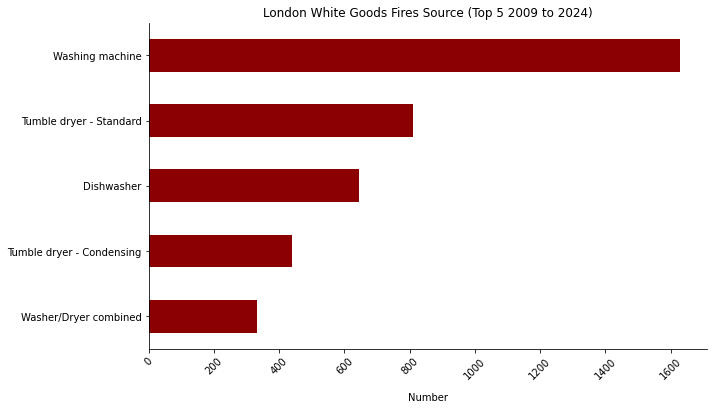

In [46]:
# Plot by fire source
plot_func2(df,"IgnitionSource","IgnitionSource","barh",'London White Goods Fires Source (Top 5 2009 to 2024)',
         "Number",None)

The top appliances involved are washing machines, tumble driers and dishwashers.Reflecting on our earlier findings of an increased number of fires towards the winter, the increased use of tumble driers in wetter weather might lead to increased number of fires. We could look at the type of white good fires by time of year that might provide more insight on this.

In [47]:
# Create list of months and sort in order of months
from calendar import month_name
month_lookup = list(month_name)
months = df['Month'].unique().tolist()
months = sorted(months, key=month_lookup.index)

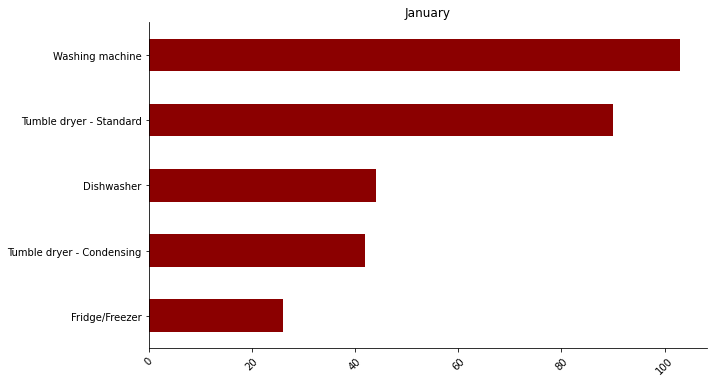

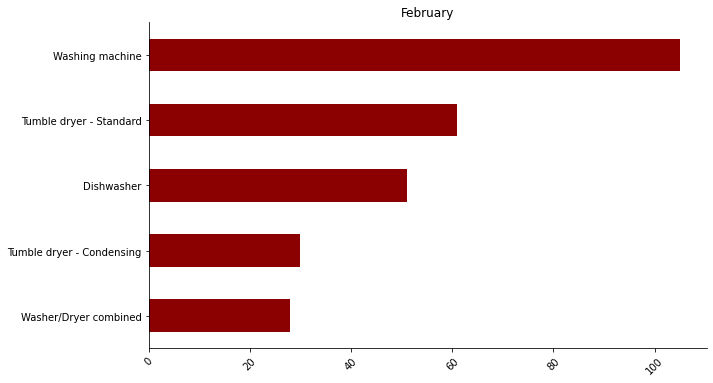

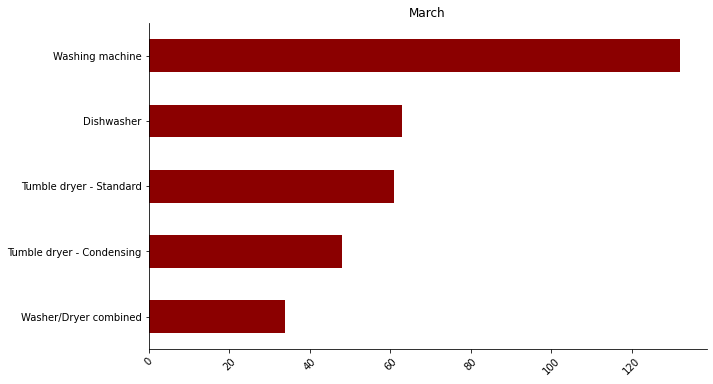

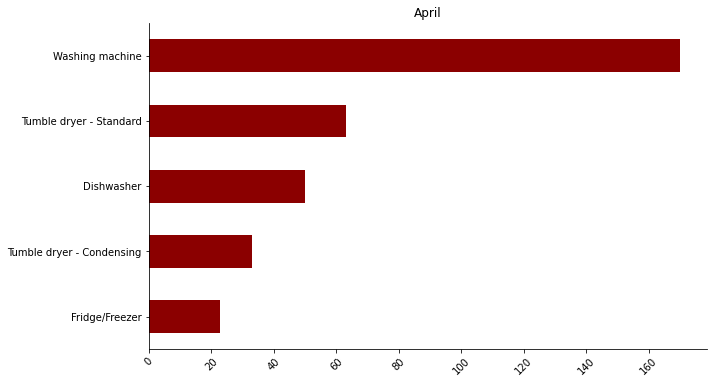

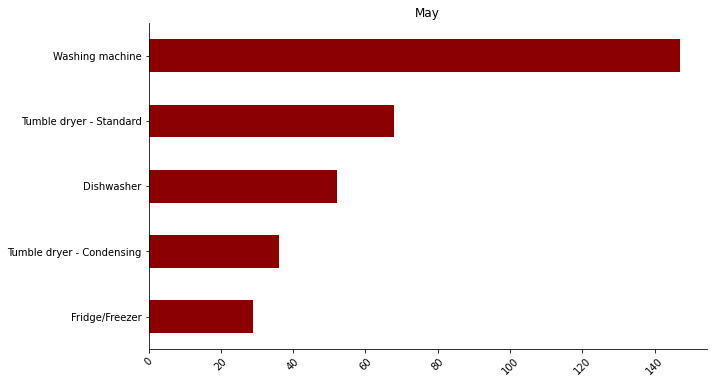

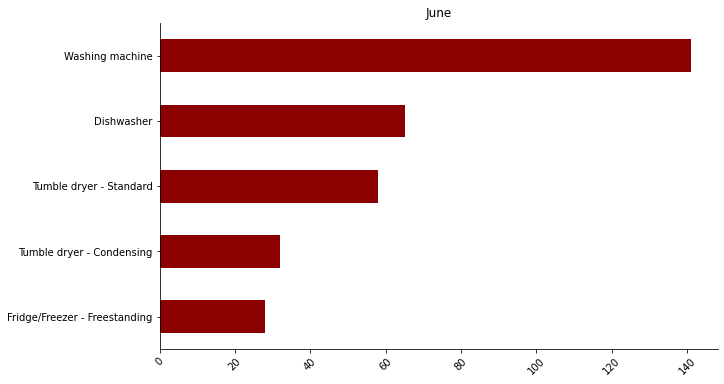

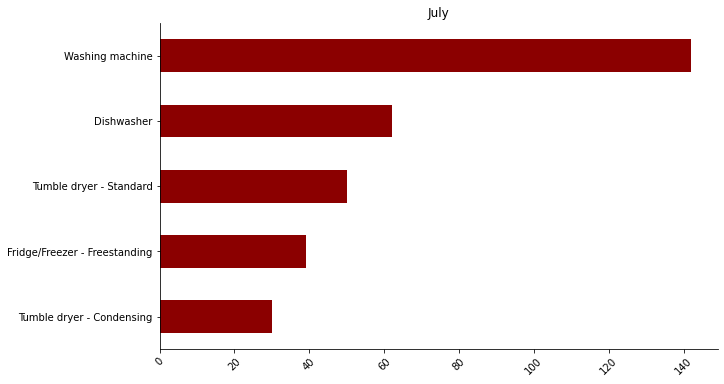

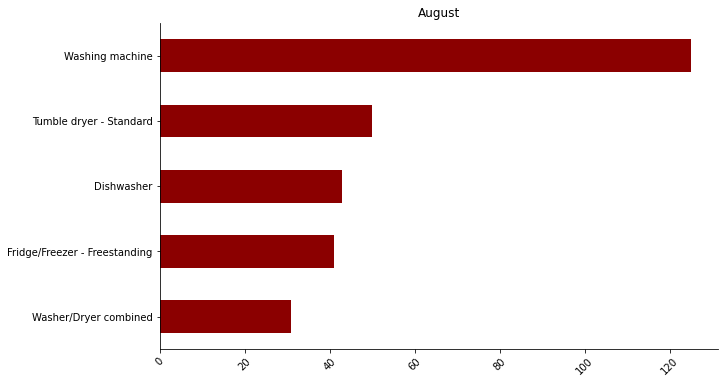

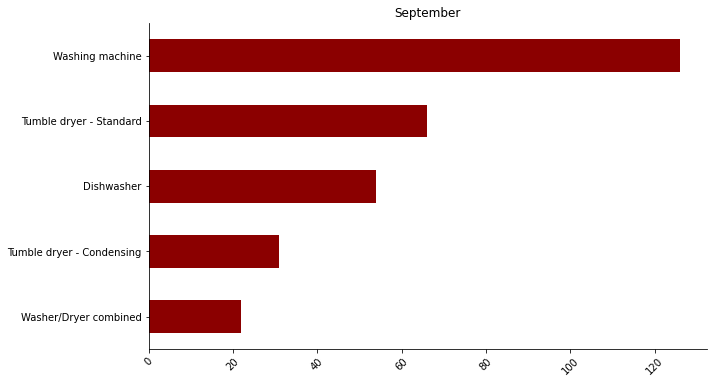

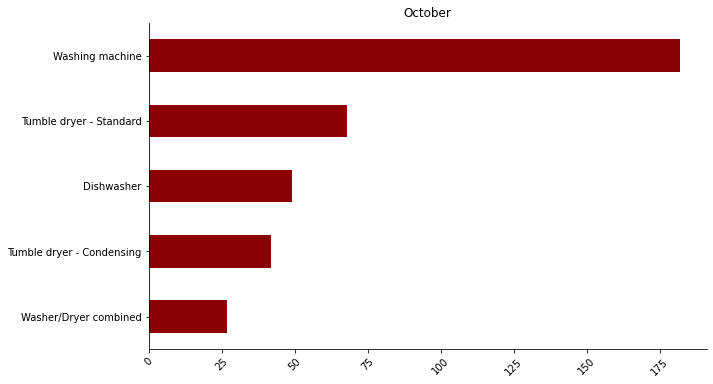

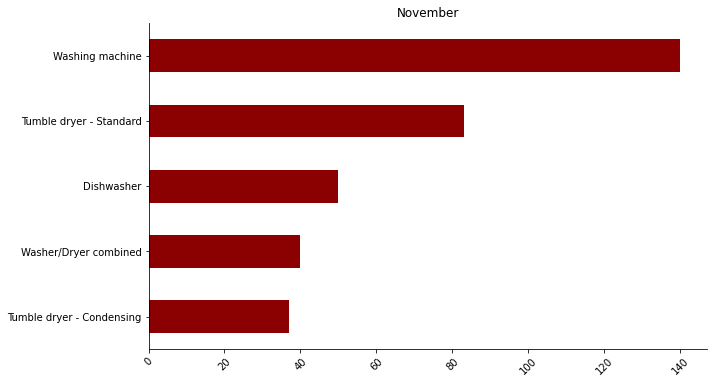

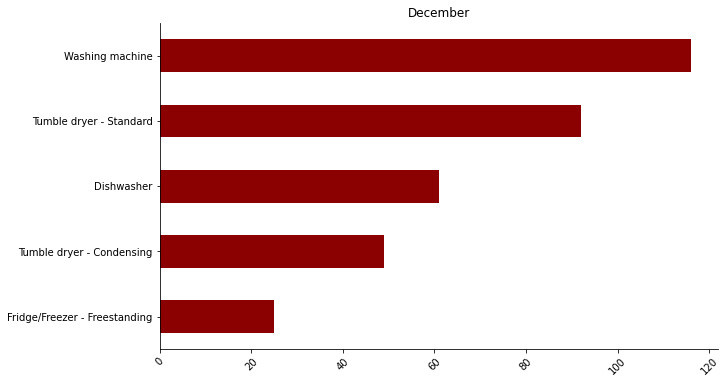

In [48]:
# Plot by fire source
for month in months:
    r = df[df['Month'] == month]
    plot_func2(r,"IgnitionSource","IgnitionSource","barh",month,
         None,None)

We can see that washing machines consistently account for the greatest number of fires followed by tumble driers,with the two categories being similar in the amount of fires for December and January. The exception is June and July where dishwashers take up the number two spot. This likely just reflects the reduced use of tumbledriers over the summer.

#### Fires by Item First Ignited

In [49]:
# Source of fire
df['ItemFirstIgnited'].value_counts(normalize = True)*100

Wiring insulation                                 29.554656
Plastic - raw material only                       18.785425
Internal Fittings                                 10.991903
Other item                                         9.939271
Clothing                                           5.384615
Not known                                          3.582996
Rubber - raw material only                         3.522267
None                                               3.340081
Printed circuit board                              3.198381
Other textiles                                     2.874494
Capacitor                                          2.834008
Unspecified internal fitting/part of structure     2.044534
Foam - raw material only                           0.931174
Other furniture                                    0.587045
Bedding                                            0.526316
Gases                                              0.323887
Other/Unspecified furnishings           

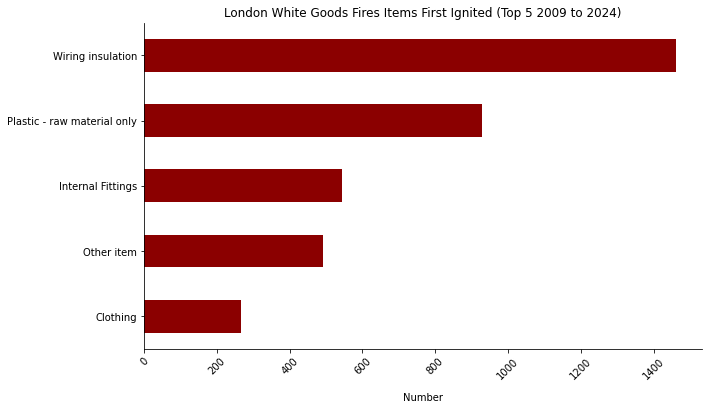

In [50]:
# Plot by items
plot_func2(df,"ItemFirstIgnited","ItemFirstIgnited","barh", 'London White Goods Fires Items First Ignited (Top 5 2009 to 2024)',
         "Number",None)

#### Fires by Location

In [51]:
# Source of fire
df['LocationFireStarted'].value_counts(normalize = True)*100

Kitchen                                  72.348178
Utility room                              8.967611
Garage                                    2.591093
Other                                     2.226721
External structures                       1.619433
Shop floor/Showroom/Display hall          1.619433
Corridor/Hall                             1.153846
Store room                                1.032389
Laundry room                              1.012146
Living room                               0.971660
Airing/Drying cupboard                    0.910931
Under stairs (enclosed, storage area)     0.890688
Bedroom                                   0.870445
Conservatory                              0.829960
Bathroom/Toilet                           0.809717
Canteen/Restaurant                        0.384615
Dining room                               0.303644
Process/Production room                   0.222672
Bedsitting room                           0.202429
Meeting room                   

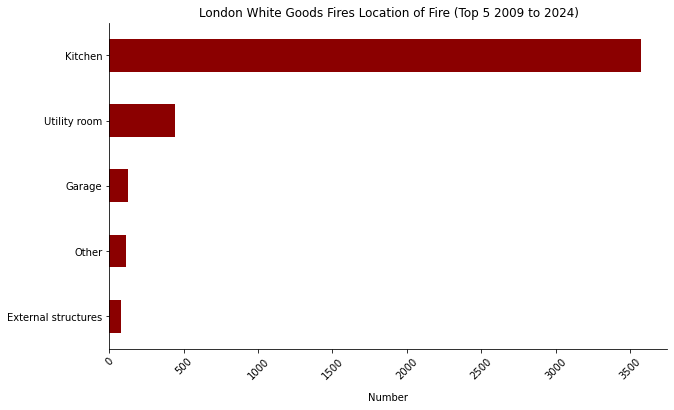

In [52]:
# Plot by location
plot_func2(df,"LocationFireStarted","LocationFireStarted","barh",'London White Goods Fires Location of Fire (Top 5 2009 to 2024)',
         "Number",None)

#### Fires by Appliance Manufacturer

In [53]:
# Missing values
df['ApplianceManufacturer'].isnull().sum()

559

In [54]:
# Value counts
df['ApplianceManufacturer'].value_counts()

HOTPOINT       835
Other          584
INDESIT        497
BEKO           371
BOSCH          345
              ... 
CANDLE           1
WARWICK          1
ARRON            1
SPEED QUEEN      1
AKAI             1
Name: ApplianceManufacturer, Length: 185, dtype: int64

In [55]:
# Set the type to upper case
df['ApplianceManufacturer'] = df['ApplianceManufacturer'].str.upper()

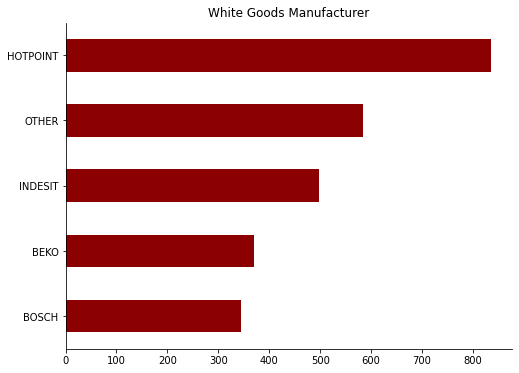

In [56]:
# Select the top five
fig, ax = plt.subplots(figsize = (8,6))
man = df['ApplianceManufacturer'].value_counts().head(5)
man.plot(kind = 'barh',
         color = 'darkred',
        title = "White Goods Manufacturer")
ax.spines[['right', 'top']].set_visible(False)
ax.invert_yaxis();

#### Findings

  
* There appears to be a trend downwards of white goods fire incidents from 2018 with 2018 having the most, with the least in 2024.  
* October has the highest number of incidents at 468 (average of 29 per year), with the least in February at 348 (average 21 per year). 
* There is some seasonality in the data, with more fires in the autumn (particularly October) than in the summer. However, the lowest by month is February which is a short month.
* Washing machines consistently account for the greatest number of fires followed by tumble driers,with the two categories being similar in the total amount of fires for the months of December and January. In June and July dishwashers take up the number two spot. This likely just reflects the reduced use of tumbledriers over the summer.
* Unsurprisingly, most fires started in the kitchen (72%) where white goods are usually located, with a further 8% in utility rooms and the main causes are wiring insulation, plastic and internal fittings issues. 
* We are missing over 500 datapoints for the manufacturer of the white good, so we should be careful drawing conclusions. However, from the data we do have, the top brand for problems is Hotpoint. This might not relate to anything in particular wrong with this brand, as it could just be the most popular manufacturer and we do not have any comparison data.
* Almost 85% of fires occur in dwellings, purpose built flats/maisonettes and converted flats and maisonettes. The rest mostly occur in non-residential settings such as retail and food and drink outlets.  
* The greatest number of white good fires per head of population occur in the City of London and the least in Newham Borough. The City of London had almost three and a half times more fires per head than the next borough in the list of Westminster.
* There was a total of 85 deaths and 707 injuries over the 16 year period which equates to 5 deaths and 47 injuries per year on average.  
* The Grenfell Tower incident in June 2017 is a significant outlier in the dataset and accounted for 71 lives of the 85 lives lost (83%) and 109 injuries (15%) over the period.

#### Other questions we might ask

* Are there any other relationships between features, for example does the type of fire, location or item vary between boroughs, over time or month?  
* Do white good fires happen more frequently in poorer neighbourhoods, perhaps because they are running older equipment?

In [57]:
# Save out file
df.to_csv(r'C:\Users\imoge\AllMLProjects\Data\WhiteGoodsCleaned')